In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

# Train data Pre-Processing

In [3]:
rawData=pd.read_csv("D:/My files/Projects/Hackathon/Train_hMYJ020/train.csv")

In [4]:
rawData.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
rawData['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [7]:
rawData['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [8]:
rawData.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
rawData=rawData.dropna(axis=0,subset=['City_Code_Patient'])

In [10]:
rawData=rawData.dropna(axis=0,subset=['Bed Grade'])

In [11]:
rawData.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [12]:
x = rawData.duplicated().sum()
print("No of Duplicate Values", x)

No of Duplicate Values 0


In [13]:
rawData=rawData.rename(columns={"Available Extra Rooms in Hospital": "Available_Rooms_in_Hspl",
                                "Bed Grade":"Bed_Grade","Type of Admission":"Type_of_Admission",
                                "Severity of Illness":"Severity_of_Illness","Visitors with Patient":"Visitors_with_Patient"})

In [14]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  313793 non-null  int64  
 1   Hospital_code            313793 non-null  int64  
 2   Hospital_type_code       313793 non-null  object 
 3   City_Code_Hospital       313793 non-null  int64  
 4   Hospital_region_code     313793 non-null  object 
 5   Available_Rooms_in_Hspl  313793 non-null  int64  
 6   Department               313793 non-null  object 
 7   Ward_Type                313793 non-null  object 
 8   Ward_Facility_Code       313793 non-null  object 
 9   Bed_Grade                313793 non-null  float64
 10  patientid                313793 non-null  int64  
 11  City_Code_Patient        313793 non-null  float64
 12  Type_of_Admission        313793 non-null  object 
 13  Severity_of_Illness      313793 non-null  object 
 14  Visi

In [15]:
rawData['Hospital_type_code']=rawData['Hospital_type_code'].astype('category')
rawData['Hospital_region_code']=rawData['Hospital_region_code'].astype('category')
rawData['Department']=rawData['Department'].astype('category')
rawData['Ward_Type']=rawData['Ward_Type'].astype('category')
rawData['Ward_Facility_Code']=rawData['Ward_Facility_Code'].astype('category')
rawData['Type_of_Admission']=rawData['Type_of_Admission'].astype('category')
rawData['Severity_of_Illness']=rawData['Severity_of_Illness'].astype('category')
rawData['Age']=rawData['Age'].astype('category')
rawData['Stay']=rawData['Stay'].astype('category')

In [16]:
rawData['Stay'].value_counts()

21-30                 86316
11-20                 77095
31-40                 54312
51-60                 34463
0-10                  23250
41-50                 11541
71-80                 10096
More than 100 Days     6548
81-90                  4761
91-100                 2713
61-70                  2698
Name: Stay, dtype: int64

In [17]:
rawData['Hospital_type_code']=rawData['Hospital_type_code'].cat.codes
rawData['Hospital_region_code']=rawData['Hospital_region_code'].cat.codes
rawData['Department']=rawData['Department'].cat.codes
rawData['Ward_Type']=rawData['Ward_Type'].cat.codes
rawData['Ward_Facility_Code']=rawData['Ward_Facility_Code'].cat.codes
rawData['Type_of_Admission']=rawData['Type_of_Admission'].cat.codes
rawData['Severity_of_Illness']=rawData['Severity_of_Illness'].cat.codes
rawData['Age']=rawData['Age'].cat.codes
rawData['Stay']=rawData['Stay'].cat.codes

In [18]:
rawData['Stay'].value_counts()

2     86316
1     77095
3     54312
5     34463
0     23250
4     11541
7     10096
10     6548
8      4761
9      2713
6      2698
Name: Stay, dtype: int64

In [19]:
rawData.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Rooms_in_Hspl,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [20]:
rawData.to_csv('D:/My files/Projects/Hackathon/Train_hMYJ020/train1.csv')

# Test data Pre-Processing

In [21]:
test_data=pd.read_csv("D:/My files/Projects/Hackathon/Test_ND2Q3bm/test.csv")
test_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Unnamed: 17
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095,NaN
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018,NaN
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492,NaN
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173,NaN
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313,NaN
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510,NaN
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190,NaN
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435,NaN


In [22]:
test_data=test_data.rename(columns={"Available Extra Rooms in Hospital": "Available_Rooms_in_Hspl",
                                "Bed Grade":"Bed_Grade","Type of Admission":"Type_of_Admission",
                                "Severity of Illness":"Severity_of_Illness","Visitors with Patient":"Visitors_with_Patient"})

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  137057 non-null  int64  
 1   Hospital_code            137057 non-null  int64  
 2   Hospital_type_code       137057 non-null  object 
 3   City_Code_Hospital       137057 non-null  int64  
 4   Hospital_region_code     137057 non-null  object 
 5   Available_Rooms_in_Hspl  137057 non-null  int64  
 6   Department               137057 non-null  object 
 7   Ward_Type                137057 non-null  object 
 8   Ward_Facility_Code       137057 non-null  object 
 9   Bed_Grade                137022 non-null  float64
 10  patientid                137057 non-null  int64  
 11  City_Code_Patient        134900 non-null  float64
 12  Type_of_Admission        137057 non-null  object 
 13  Severity_of_Illness      137057 non-null  object 
 14  Visi

In [24]:
test_data.isnull().sum()

case_id                         0
Hospital_code                   0
Hospital_type_code              0
City_Code_Hospital              0
Hospital_region_code            0
Available_Rooms_in_Hspl         0
Department                      0
Ward_Type                       0
Ward_Facility_Code              0
Bed_Grade                      35
patientid                       0
City_Code_Patient            2157
Type_of_Admission               0
Severity_of_Illness             0
Visitors_with_Patient           0
Age                             0
Admission_Deposit               0
Unnamed: 17                137057
dtype: int64

In [25]:
test_data['City_Code_Patient'] = test_data['City_Code_Patient'].fillna(test_data['City_Code_Patient'].mode()[0])
test_data['Bed_Grade'] = test_data['Bed_Grade'].fillna(test_data['Bed_Grade'].mode()[0])

In [26]:
test_data.isnull().sum()

case_id                         0
Hospital_code                   0
Hospital_type_code              0
City_Code_Hospital              0
Hospital_region_code            0
Available_Rooms_in_Hspl         0
Department                      0
Ward_Type                       0
Ward_Facility_Code              0
Bed_Grade                       0
patientid                       0
City_Code_Patient               0
Type_of_Admission               0
Severity_of_Illness             0
Visitors_with_Patient           0
Age                             0
Admission_Deposit               0
Unnamed: 17                137057
dtype: int64

In [27]:
test_data['Hospital_type_code']=test_data['Hospital_type_code'].astype('category')
test_data['Hospital_region_code']=test_data['Hospital_region_code'].astype('category')
test_data['Department']=test_data['Department'].astype('category')
test_data['Ward_Type']=test_data['Ward_Type'].astype('category')
test_data['Ward_Facility_Code']=test_data['Ward_Facility_Code'].astype('category')
test_data['Type_of_Admission']=test_data['Type_of_Admission'].astype('category')
test_data['Severity_of_Illness']=test_data['Severity_of_Illness'].astype('category')
test_data['Age']=test_data['Age'].astype('category')

In [28]:
test_data['Hospital_type_code']=test_data['Hospital_type_code'].cat.codes
test_data['Hospital_region_code']=test_data['Hospital_region_code'].cat.codes
test_data['Department']=test_data['Department'].cat.codes
test_data['Ward_Type']=test_data['Ward_Type'].cat.codes
test_data['Ward_Facility_Code']=test_data['Ward_Facility_Code'].cat.codes
test_data['Type_of_Admission']=test_data['Type_of_Admission'].cat.codes
test_data['Severity_of_Illness']=test_data['Severity_of_Illness'].cat.codes
test_data['Age']=test_data['Age'].cat.codes

In [29]:
test_data.to_csv('D:/My files/Projects/Hackathon/Test_ND2Q3bm/test1.csv')

# Read Pre-Processed test data

In [30]:
test_data=pd.read_csv("D:/My files/Projects/Hackathon/Test_ND2Q3bm/test1.csv")

In [31]:
data_test=test_data.copy(deep=True)

In [32]:
corr=data_test.corr()
corr

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Rooms_in_Hspl,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Unnamed: 17
Unnamed: 0,1.000000,1.000000,-0.045982,0.000593,-0.012916,0.006442,0.050804,-0.005887,-0.026745,-0.005893,0.015756,0.006000,0.075474,0.077946,0.015423,0.001000,-0.031002,-0.040073,NaN
case_id,1.000000,1.000000,-0.045982,0.000593,-0.012916,0.006442,0.050804,-0.005887,-0.026745,-0.005893,0.015756,0.006000,0.075474,0.077946,0.015423,0.001000,-0.031002,-0.040073,NaN
Hospital_code,-0.045982,-0.045982,1.000000,0.036730,0.126531,-0.136266,-0.056650,-0.001501,0.158827,-0.128795,-0.017694,0.004349,-0.014465,-0.015381,-0.005143,-0.027404,0.007893,0.048474,NaN
Hospital_type_code,0.000593,0.000593,0.036730,1.000000,-0.005863,0.271757,-0.100781,0.005144,0.241546,-0.266961,0.017623,-0.004091,0.055244,0.077665,-0.009205,-0.046164,0.008012,0.027589,NaN
City_Code_Hospital,-0.012916,-0.012916,0.126531,-0.005863,1.000000,0.001371,-0.044260,0.029055,0.121591,-0.091563,-0.046395,0.003642,-0.027944,-0.019555,-0.000116,0.018822,0.016886,-0.035529,NaN
Hospital_region_code,0.006442,0.006442,-0.136266,0.271757,0.001371,1.000000,-0.005883,0.043891,0.075574,-0.512918,-0.042207,-0.000538,0.140401,0.003575,-0.016144,-0.024856,-0.003386,0.078413,NaN
Available_Rooms_in_Hspl,0.050804,0.050804,-0.056650,-0.100781,-0.044260,-0.005883,1.000000,0.039708,-0.431769,0.043224,-0.113927,0.003030,-0.006379,-0.013710,0.014555,0.093658,-0.131378,-0.142906,NaN
Department,-0.005887,-0.005887,-0.001501,0.005144,0.029055,0.043891,0.039708,1.000000,-0.001250,-0.040054,-0.098253,-0.005646,0.013771,-0.080311,-0.003432,0.026015,0.033831,-0.078215,NaN
Ward_Type,-0.026745,-0.026745,0.158827,0.241546,0.121591,0.075574,-0.431769,-0.001250,1.000000,-0.151996,-0.014130,0.002175,0.012280,0.007076,0.003923,-0.092147,0.033275,0.048060,NaN
Ward_Facility_Code,-0.005893,-0.005893,-0.128795,-0.266961,-0.091563,-0.512918,0.043224,-0.040054,-0.151996,1.000000,0.076591,-0.001768,-0.132044,0.039061,0.019921,0.028753,-0.005078,-0.023771,NaN


In [33]:
data_test=data_test.drop(['Unnamed: 0','Unnamed: 17'],axis=1)

# Read Pre-Processed train data

In [34]:
rawData=pd.read_csv("D:/My files/Projects/Hackathon/Train_hMYJ020/train1.csv")

In [35]:
data_train=rawData.copy(deep=True)

In [36]:
corr=data_train.corr()
corr

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Rooms_in_Hspl,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
Unnamed: 0,1.000000,1.000000,-0.042911,0.002237,-0.010386,0.007698,0.042452,-0.001623,-0.029023,-0.012671,0.012282,-0.003871,0.065213,0.077930,0.014915,0.000647,-0.115396,-0.045276,-0.054310
case_id,1.000000,1.000000,-0.042911,0.002237,-0.010386,0.007698,0.042452,-0.001623,-0.029023,-0.012671,0.012282,-0.003871,0.065213,0.077930,0.014915,0.000647,-0.115396,-0.045276,-0.054310
Hospital_code,-0.042911,-0.042911,1.000000,0.038583,0.128403,-0.137322,-0.059348,0.001087,0.160744,-0.132051,-0.013627,0.002262,-0.015709,-0.014711,-0.008116,-0.028103,0.016279,0.044950,0.042894
Hospital_type_code,0.002237,0.002237,0.038583,1.000000,-0.000409,0.268847,-0.102795,0.001659,0.245948,-0.265238,0.019073,-0.002992,0.055662,0.079959,-0.004751,-0.045036,0.006312,0.025788,0.058973
City_Code_Hospital,-0.010386,-0.010386,0.128403,-0.000409,1.000000,0.006642,-0.045547,0.029753,0.122430,-0.100236,-0.048096,0.000837,-0.023951,-0.016807,-0.000093,0.019330,0.020499,-0.035185,0.006626
Hospital_region_code,0.007698,0.007698,-0.137322,0.268847,0.006642,1.000000,-0.006193,0.041584,0.077406,-0.506425,-0.041018,-0.002246,0.152212,0.004488,-0.006144,-0.018559,-0.017653,0.074788,0.012002
Available_Rooms_in_Hspl,0.042452,0.042452,-0.059348,-0.102795,-0.045547,-0.006193,1.000000,0.047692,-0.433862,0.050214,-0.117125,0.000740,-0.009651,-0.016108,0.015208,0.096230,-0.133048,-0.143806,-0.121564
Department,-0.001623,-0.001623,0.001087,0.001659,0.029753,0.041584,0.047692,1.000000,-0.005936,-0.040463,-0.096995,0.002533,0.019649,-0.079997,-0.007832,0.025502,0.035651,-0.081019,0.032712
Ward_Type,-0.029023,-0.029023,0.160744,0.245948,0.122430,0.077406,-0.433862,-0.005936,1.000000,-0.154861,-0.012769,0.000642,0.015964,0.012390,0.001162,-0.095961,0.024301,0.050906,0.185755
Ward_Facility_Code,-0.012671,-0.012671,-0.132051,-0.265238,-0.100236,-0.506425,0.050214,-0.040463,-0.154861,1.000000,0.075247,0.001791,-0.140853,0.044292,0.014971,0.021532,-0.000449,-0.022918,-0.004777


In [37]:
data_train=data_train.drop(['Unnamed: 0'],axis=1)

# Assumptions

## A. Multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
X = add_constant(data_train)
print ("VIF:")
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF:


const                      116.250321
case_id                      1.031644
Hospital_code                1.121435
Hospital_type_code           1.174378
City_Code_Hospital           1.044353
Hospital_region_code         1.494766
Available_Rooms_in_Hspl      1.322277
Department                   1.026068
Ward_Type                    1.418444
Ward_Facility_Code           1.492384
Bed_Grade                    1.074151
patientid                    1.000150
City_Code_Patient            1.036746
Type_of_Admission            1.064815
Severity_of_Illness          1.006128
Visitors_with_Patient        1.592801
Age                          1.048124
Admission_Deposit            1.067225
Stay                         1.581080
dtype: float64

####  If VIF is more than 10, then multicollinearity is taken to be high. It can be seen that all the values are very less than 10, which indicates the absence of multicollinearity.


## B. Outliers

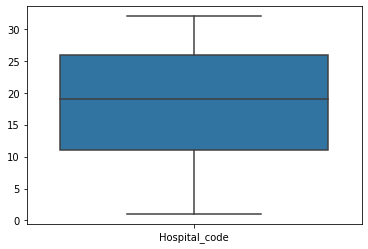

In [40]:
ssc = sns.boxplot(data= data_train[['Hospital_code']])

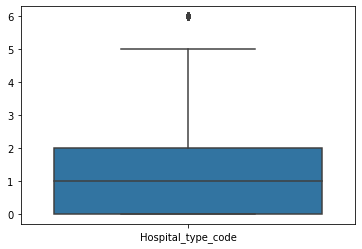

In [41]:
ssc = sns.boxplot(data= data_train[['Hospital_type_code']])

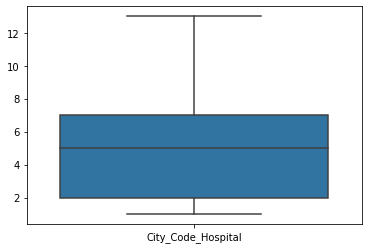

In [42]:
ssc = sns.boxplot(data= data_train[['City_Code_Hospital']])

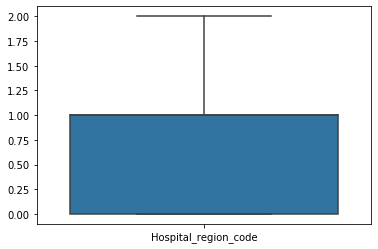

In [43]:
ssc = sns.boxplot(data= data_train[['Hospital_region_code']])

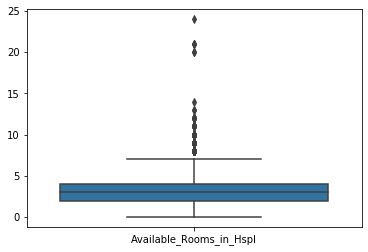

In [44]:
ssc = sns.boxplot(data= data_train[['Available_Rooms_in_Hspl']])

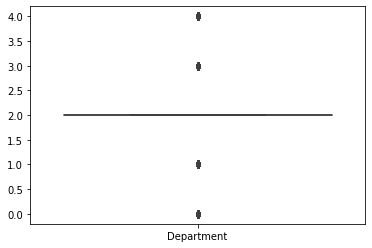

In [45]:
ssc = sns.boxplot(data= data_train[['Department']])

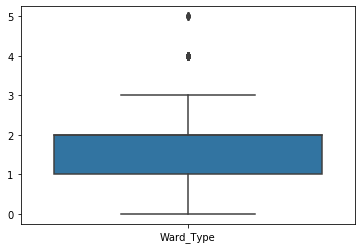

In [46]:
ssc = sns.boxplot(data= data_train[['Ward_Type']])

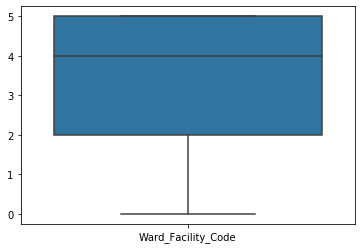

In [47]:
ssc = sns.boxplot(data= data_train[['Ward_Facility_Code']])

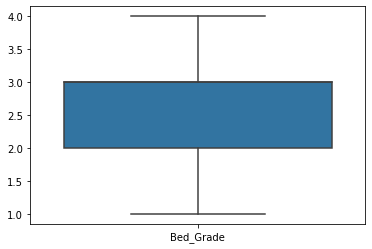

In [48]:
ssc = sns.boxplot(data= data_train[['Bed_Grade']])

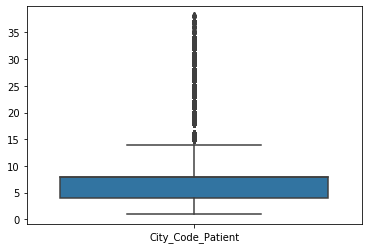

In [49]:
ssc = sns.boxplot(data= data_train[['City_Code_Patient']])

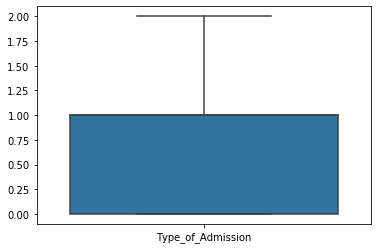

In [50]:
ssc = sns.boxplot(data= data_train[['Type_of_Admission']])

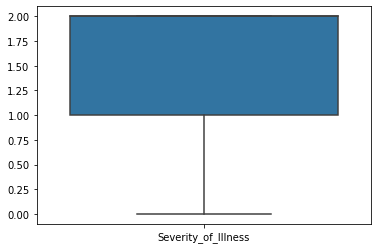

In [51]:
ssc = sns.boxplot(data= data_train[['Severity_of_Illness']])

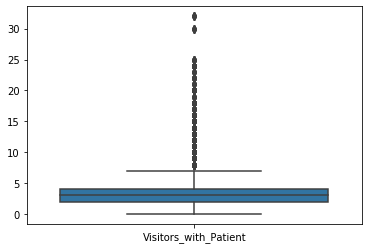

In [52]:
ssc = sns.boxplot(data= data_train[['Visitors_with_Patient']])

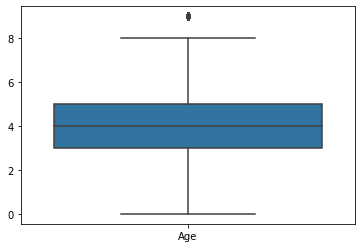

In [53]:
ssc = sns.boxplot(data= data_train[['Age']])

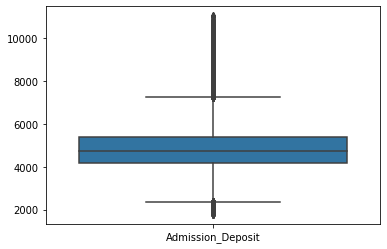

In [54]:
ssc = sns.boxplot(data= data_train[['Admission_Deposit']])

### There are a lot of outliers present in the columns 'Available_Rooms_in_Hspl', 'City_Code_Patient', 'Visitors_with_Patient', and 'Admission_Deposit', so we remove those using Z-Score.

In [55]:
from scipy import stats
z = np.abs(stats.zscore(data_train))
print(z)

[[1.72871456 1.19607352 0.4834244  ... 0.4613891  0.0267959  1.25516928]
 [1.72870368 1.89103285 0.4834244  ... 0.4613891  0.9869869  0.60709732]
 [1.72869281 0.96442042 1.78607135 ... 0.4613891  0.12602453 0.14153067]
 ...
 [1.73481834 1.31190008 0.81922256 ... 1.51925175 0.59553307 0.78960263]
 [1.73482922 0.84859386 0.16789908 ... 1.6543362  1.03189984 0.78960263]
 [1.7348401  0.07801856 0.81922256 ... 1.6543362  0.1195803  1.25516928]]


In [56]:
threshold = 3
print(np.where(z > 3))

(array([    10,     13,     15, ..., 313782, 313787, 313788], dtype=int64), array([ 2, 16, 16, ...,  6, 16, 11], dtype=int64))


In [57]:
data_train_o = data_train[(z < 3).all(axis=1)]

In [58]:
data_train_o.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Rooms_in_Hspl,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


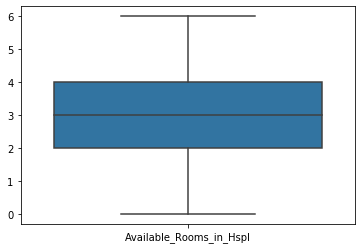

In [59]:
ssc = sns.boxplot(data= data_train_o[['Available_Rooms_in_Hspl']])

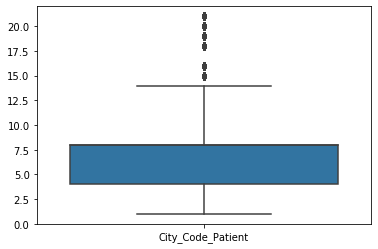

In [60]:
ssc = sns.boxplot(data= data_train_o[['City_Code_Patient']])

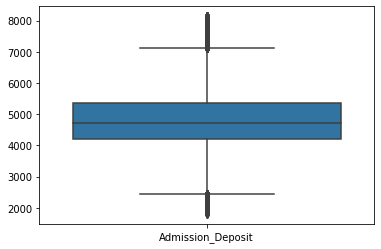

In [61]:
ssc = sns.boxplot(data= data_train_o[['Admission_Deposit']])

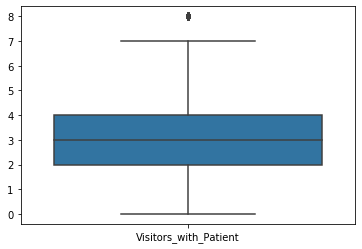

In [62]:
ssc = sns.boxplot(data= data_train_o[['Visitors_with_Patient']])

# Model

In [63]:
x_train=data_train_o.drop(['patientid','case_id','Stay'],axis=1)
y_train=data_train_o['Stay']

In [64]:
column_names = x_train.columns.values
column_names

array(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Rooms_in_Hspl', 'Department',
       'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'City_Code_Patient', 'Type_of_Admission', 'Severity_of_Illness',
       'Visitors_with_Patient', 'Age', 'Admission_Deposit'], dtype=object)

In [65]:
#Scalizing between 0-1 (Normalization)
x_scaled = MinMaxScaler().fit_transform(x_train)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model= LogisticRegression()
model.fit(x_scaled,y_train)

C:\Users\Richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model.score(x_scaled,y_train)

0.3821907557286293

# Model with fewer features and good accuracy

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [70]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=8, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(x_scaled, y_train)
print(sel_rfe_tree.get_support())

[ True False  True False  True False False False  True  True False False
  True  True  True]


In [71]:
x_train1=data_train_o[['Hospital_code','City_Code_Hospital','Available_Rooms_in_Hspl','Bed_Grade','City_Code_Patient',
                    'Visitors_with_Patient','Age','Admission_Deposit']]
y_train1=data_train_o['Stay']

In [72]:
#Scalizing between 0-1 (Normalization)
x_scaled1 = MinMaxScaler().fit_transform(x_train1)

In [73]:
model1= LogisticRegression()
model1.fit(x_scaled1,y_train1)

C:\Users\Richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
model1.score(x_scaled1,y_train1)

0.36241481524534663

# Predictions

In [75]:
x_test=data_test[['Hospital_code','City_Code_Hospital','Available_Rooms_in_Hspl','Bed_Grade','City_Code_Patient',
                  'Visitors_with_Patient','Age','Admission_Deposit']]
x_test.head()

,Hospital_code,City_Code_Hospital,Available_Rooms_in_Hspl,Bed_Grade,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit
0,21,3,3,2.0,2.0,2,6,3095
1,29,4,2,2.0,2.0,4,6,4018
2,26,2,3,4.0,2.0,3,6,4492
3,6,6,3,2.0,2.0,3,6,4173
4,28,11,2,2.0,2.0,4,6,4161


In [76]:
y_pred= model1.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [77]:
y_pred=pd.DataFrame(data=y_pred)
y_pred

,0
0,2
1,2
2,2
3,2
4,2
...,...
137052,2
137053,2
137054,2
137055,2


In [78]:
y_pred.columns=['Stay']

In [79]:
y_pred.loc[y_pred['Stay']==0, 'Stay']="0-10"
y_pred.loc[y_pred['Stay']==1, 'Stay']="11-20"
y_pred.loc[y_pred['Stay']==2, 'Stay']="21-30"
y_pred.loc[y_pred['Stay']==3, 'Stay']="31-40"
y_pred.loc[y_pred['Stay']==4, 'Stay']="41-50"
y_pred.loc[y_pred['Stay']==5, 'Stay']="51-60"
y_pred.loc[y_pred['Stay']==6, 'Stay']="61-70"
y_pred.loc[y_pred['Stay']==7, 'Stay']="71-80"
y_pred.loc[y_pred['Stay']==8, 'Stay']="81-90"
y_pred.loc[y_pred['Stay']==9, 'Stay']="91-100"
y_pred.loc[y_pred['Stay']==10, 'Stay']="More than 100 Days"

y_pred.head()

,Stay
0,21-30
1,21-30
2,21-30
3,21-30
4,21-30


In [80]:
sol=pd.DataFrame()

In [81]:
sol['case_id']= data_test['case_id']
sol.head()

,case_id
0,318439
1,318440
2,318441
3,318442
4,318443


In [82]:
sol['Stay']=y_pred['Stay']
sol.head()

,case_id,Stay
0,318439,21-30
1,318440,21-30
2,318441,21-30
3,318442,21-30
4,318443,21-30


In [83]:
sol.to_csv('D:/My files/Projects/Hackathon/sol2.csv',index=False)